### Decision Tree Training & Evaluation

This notebook trains a Decision Tree Classifier for binary classification on the Mushroom Dataset.

Steps Covered:

- Train Decision Trees with different splitting criteria
- Analyze Overfitting & Underfitting
- Perform Hyperparameter Tuning to find the best model

#### Load Preprocessed Data

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from decision_tree import DecisionTree  
from IPython.display import display

# Load Preprocessed Data
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Verify dataset shapes
print(f"Training Set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test Set: X_test {X_test.shape}, y_test {y_test.shape}")


Training Set: X_train (48855, 15), y_train (48855,)
Test Set: X_test (10992, 15), y_test (10992,)


#### Train Decision Tree with Different Splitting Criteria
Compare how different splitting criteria (Gini, Entropy, and Misclassification) affect decision tree performance.
- Training all models under the same conditions ensures a fair comparison.
- If one criterion consistently outperforms the others, it might be better suited for this dataset. 

In [2]:
# Define different splitting criteria
criteria = ["gini", "entropy", "misclassification"]
models = {}

for criterion in criteria:
    print(f"Training Decision Tree with `{criterion}` criterion...")
    tree = DecisionTree(max_depth=10, min_impurity_decrease=0.01, criterion=criterion)
    tree.fit(X_train, y_train)
    models[criterion] = tree

    # Compute accuracy
    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc = accuracy_score(y_test, tree.predict(X_test))

    print(f"Training Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")


Training Decision Tree with `gini` criterion...
Training Accuracy: 0.8614 | Test Accuracy: 0.8566
Training Decision Tree with `entropy` criterion...
Training Accuracy: 0.8499 | Test Accuracy: 0.8486
Training Decision Tree with `misclassification` criterion...
Training Accuracy: 0.7752 | Test Accuracy: 0.7722


#### Overfitting vs. Underfitting Analysis
Analyze how tree depth affects overfitting vs. underfitting.
- If train accuracy is much higher than test accuracy, the model is overfitting by memorizing training data.
- If train and test accuracy are both low, the model is underfitting and too simple to capture patterns.
- A well-balanced depth should have similar train and test accuracy.

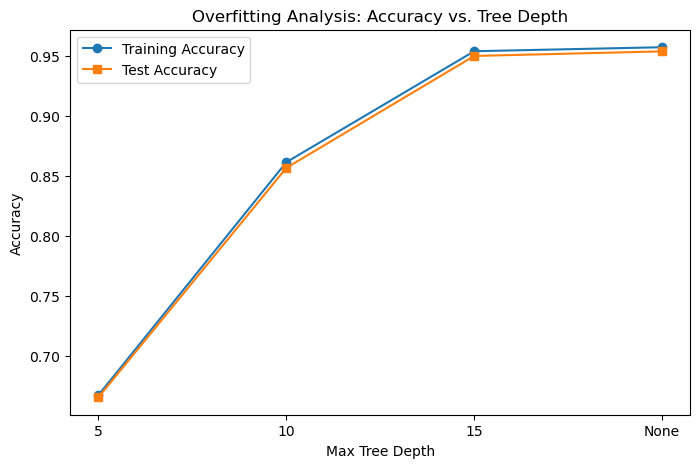

In [3]:
# Define different max depths to analyze overfitting
max_depth_values = [5, 10, 15, None]  # None means fully grown tree
train_accuracies, test_accuracies = [], []

for depth in max_depth_values:
    tree = DecisionTree(max_depth=depth, min_impurity_decrease=0.01, criterion="gini")
    tree.fit(X_train, y_train)
    
    # Compute accuracy
    train_accuracies.append(accuracy_score(y_train, tree.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, tree.predict(X_test)))

# Plot Accuracy vs. Tree Depth
plt.figure(figsize=(8, 5))
plt.plot([str(d) for d in max_depth_values], train_accuracies, marker="o", label="Training Accuracy")
plt.plot([str(d) for d in max_depth_values], test_accuracies, marker="s", label="Test Accuracy")
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis: Accuracy vs. Tree Depth")
plt.legend()
plt.show()

#### Hyperparameter Tuning (Grid Search)
Find the best tree configuration by systematically testing different parameters.
- Grid search helps optimize hyperparameters, ensuring the best generalization to new data.
- The best parameters will have the highest test accuracy, not just training accuracy.
- If accuracy varies a lot across different parameters, the model may be unstable or sensitive to settings.

In [4]:
# Perform hyperparameter tuning with different splitting criteria and stopping criteria
search_results = []

for criterion in criteria:
    for depth in max_depth_values:
        for min_impurity in [0.0, 0.01, 0.05]:
            tree = DecisionTree(max_depth=depth, min_impurity_decrease=min_impurity, criterion=criterion)
            tree.fit(X_train, y_train)
            test_acc = accuracy_score(y_test, tree.predict(X_test))
            search_results.append({
                "Criterion": criterion,
                "Max Depth": depth,
                "Min Impurity": min_impurity,
                "Test Accuracy": test_acc
            })

# Convert to DataFrame and display results
search_df = pd.DataFrame(search_results)

# Identify the best model
best_model = search_df.loc[search_df["Test Accuracy"].idxmax()]
print("Best Model Found:")
display(best_model)

Best Model Found:


Criterion            gini
Max Depth             NaN
Min Impurity          0.0
Test Accuracy    0.996361
Name: 9, dtype: object

#### Focused Comparison: Depth=15 vs. Fully Grown Tree
Compare a fully grown tree vs. a pruned tree (Depth=15) to check for overfitting.
- If the fully grown tree has much higher train accuracy than test accuracy, it overfits.
- If the depth-15 tree performs similarly on test data but has less overfitting, it’s the better choice.
- A pruned tree should maintain accuracy while reducing complexity.


In [5]:
 # Define hyperparameter values
depth_values = [15, None]  # Focus only on 15 vs. None
min_impurity_values = [0.0, 0.01]  # Limited impurity values

# Store results
refined_results = []

# Perform the focused grid search
for max_depth in depth_values:
    for min_impurity in min_impurity_values:
        # Train decision tree
        tree = DecisionTree(max_depth=max_depth, min_impurity_decrease=min_impurity, criterion="gini")
        tree.fit(X_train, y_train) 

        # Evaluate on test set
        y_pred = tree.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)

        # Store results
        refined_results.append({
            "Max Depth": max_depth,
            "Min Impurity Decrease": min_impurity,
            "Test Accuracy": test_acc
        })

# Convert to DataFrame
refined_results_df = pd.DataFrame(refined_results)

# Display comparison table
display(refined_results_df)

,Max Depth,Min Impurity Decrease,Test Accuracy
0,15.0,0.00,0.990266
1,15.0,0.01,0.950055
2,NaN,0.00,0.996361
3,NaN,0.01,0.953876
